# **K-Nearest Neighbor(KNN) Algorithm**

In [61]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

In [2]:
# Import iris dataset
iris = pd.read_csv("/content/iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [5]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [6]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [8]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, # shuffle the data to avoid bias
                                                    random_state= 0)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [9]:
# find training and test size
print(f'Training size: {X_train.shape[0]} samples \nTest size: {X_test.shape[0]} samples')

Training size: 120 samples 
Test size: 30 samples


In [10]:
scaler = Normalizer().fit(X_train) # the scaler is fitted to the training set
normalized_X_train = scaler.transform(X_train) # the scaler is applied to the training set
normalized_X_test = scaler.transform(X_test) # the scaler is applied to the test set

In [13]:
# X train before norm
print('X train before Normalization')
print(X_train[0:5])
# X train after norm
print('\nX train after Normalization')
print(normalized_X_train[0:5])

X train before Normalization
[[138.    6.4   3.1   5.5   1.8]
 [ 85.    5.4   3.    4.5   1.5]
 [ 28.    5.2   3.5   1.5   0.2]
 [128.    6.1   3.    4.9   1.8]
 [133.    6.4   2.8   5.6   2.2]]

X train after Normalization
[[0.99780029 0.0462748  0.02241435 0.0397674  0.01301479]
 [0.99582833 0.06326439 0.03514688 0.05272032 0.01757344]
 [0.97449238 0.18097716 0.12181155 0.05220495 0.00696066]
 [0.99776569 0.04754977 0.02338513 0.03819572 0.01403108]
 [0.997606   0.0480051  0.02100223 0.04200446 0.01650175]]


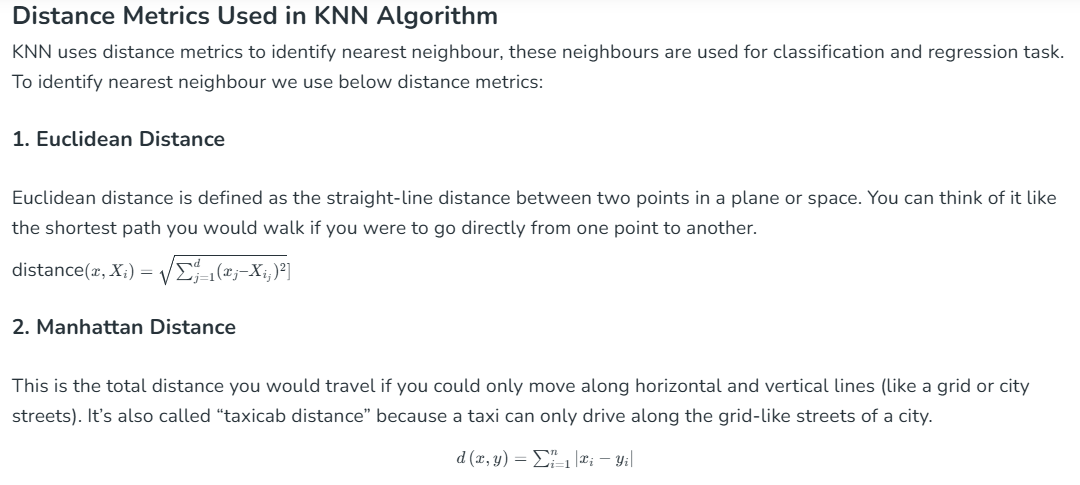

# Step:1(Euclidean Distance)

In [26]:
def distance_ecul(X_train, X_test_point):
  """
  Input:
     - x_train: corresponding to the training data
    - x_test_point: corresponding to the test point

  Output:
    -distances: The distances between the test point and each point in the training data.

  """
  distances = [] ## Create empty list called distances
  for row in range(len(X_train)): # Loop over the rows by point
      current_train_point = X_train[row] # Get them point by point
      current_distance = 0 # initialize the distance by zero

      for col in range(len(current_train_point)): # Loop over the columns of the row
         current_distance += (current_train_point[col] - X_test_point[col]) **2
         ## or current_distance = current_distance + (X_train[i] - X_test_point[i])**2
      current_distance = np.sqrt(current_distance)

      distances.append(current_distance) ## append the distances

  # store distances in a dataframe
  distances = pd.DataFrame(data=distances, columns=['dist'])
  return distances

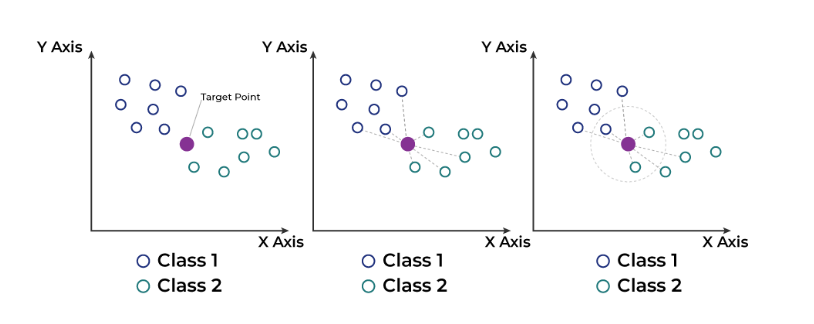

# Step:2(Find the nearest neighbours)

In [27]:
def nearest_neighbours(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """

    # Sort values using the sort_values function
    df_nearest = distance_point.sort_values(by=['dist'], axis=0)

    # Take only the first K neighbours
    df_nearest = df_nearest[:K]
    return df_nearest


# Step:3(Classify the point based on a majority vote)

In [28]:
def voting(df_nearest, y_train):
     """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """

    # use the Counter object to get the labels with K nearest neighbours.
     counter_vote = Counter(y_train[df_nearest.index])
     y_pred = counter_vote.most_common()[0][0] # majority voting
     return y_pred




# Full Algorithm: Putting Everything together

In [34]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """

    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecul(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbours(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred

# Test the KNN Algorithm on the test dataset

In [35]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_X_train, y_train, normalized_X_test, K)
print(y_pred_scratch)

['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa']


**Compare our implementation with Sklearn library**

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(normalized_X_train, y_train)
y_pred_sklearn = knn.predict(normalized_X_test)
print(y_pred_sklearn)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']


**Check if the output is exactly the same**

In [37]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True


**Calculate the accuracy of both methods**

In [38]:
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 0.9666666666666667
The accuracy of sklearn implementation is 0.9666666666666667


# **2.1_KNN_movie_dataset**

In [39]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


In [43]:
# import movies dataset
df = pd.read_csv('/content/datasetmovies (1) (1).csv')
attributes = df.columns.tolist()
print(attributes)
feature_names = attributes[0:2]
print(feature_names)
target_name = attributes[2]
print(target_name)

['No. of action scene', 'No.of comedy scene', 'Class/Label/categories']
['No. of action scene', 'No.of comedy scene']
Class/Label/categories


In [44]:
df.head()

,No. of action scene,No.of comedy scene,Class/Label/categories
0,100,15,Action
1,20,95,comedy
2,90,5,Action
3,10,85,Comedy


In [45]:
df.describe()

,No. of action scene,No.of comedy scene
count,4.000000,4.000000
mean,55.000000,50.000000
std,46.547467,46.547467
min,10.000000,5.000000
25%,17.500000,12.500000
50%,55.000000,50.000000
75%,92.500000,87.500000
max,100.000000,95.000000


In [46]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train)
print(X_test)
print(y_train)

[[ 20  95]
 [100  15]]
[[90  5]
 [10 85]]
['comedy' 'Action']


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # avoid date leakage

In [52]:
print(X_train)

[[-1.  1.]
 [ 1. -1.]]


In [55]:
def euclidean_distance(x1, x2):
  distance = np.sqrt(np.sum((x1-x2)**2))
  return distance

class KNN:
  def __init__(self, k=3):
    self.k = K

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    # compute the distance
    distances = [euclidean_distance(x, X_train) for X_train in self.X_train]

    # get the closest k
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    # majority vote
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]

In [60]:
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(predictions)
# Accuracy
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)

['Action', 'comedy']
0.5
